In [1]:
import basis_set_exchange as bse
import scipy as sp
import matplotlib.pyplot as plt
from pyscf import gto,scf
import copy
import numpy as np
import scipy
from scipy.interpolate import interp1d
from pyscf.data.elements import _symbol
from numpy.linalg import norm

In [2]:
import sys
sys.path.append("./Libs")
from FcMole import FcM
from FDcoeffs import get_coeffs

In [3]:
n_321g=gto.basis.load(bse.get_basis("def2-qzvpp",fmt="nwchem",elements=["N"]),"N")
c_321g=gto.basis.load(bse.get_basis("def2-qzvpp",fmt="nwchem",elements=["C"]),"C")
n_321g,"*******************",c_321g

([[0,
   [90726.88921, 3.9257887368e-05],
   [13590.528801, 0.00030513316455],
   [3092.9883781, 0.0016000560446],
   [875.99876362, 0.0066982937306],
   [285.74469982, 0.023690078765],
   [103.11913417, 0.071455405268],
   [40.128556777, 0.17632774876],
   [16.528095704, 0.32677592815]],
  [0, [69.390960983, 0.080052094386], [20.428200596, 0.78268063538]],
  [0, [7.1292587972, 1.0]],
  [0, [3.1324304893, 1.0]],
  [0, [0.98755778723, 1.0]],
  [0, [0.38765721307, 1.0]],
  [0, [0.14909883075, 1.0]],
  [1,
   [150.0574267, -0.00086216165986],
   [35.491599483, -0.0068571273236],
   [11.247864223, -0.031795688855],
   [4.0900305195, -0.10537396822],
   [1.6220573146, -0.24519708041]],
  [1, [0.6644226153, 1.0]],
  [1, [0.2709977007, 1.0]],
  [1, [0.10688749984, 1.0]],
  [2, [2.837, 1.0]],
  [2, [0.968, 1.0]],
  [2, [0.335, 1.0]],
  [3, [2.027, 1.0]],
  [3, [0.685, 1.0]],
  [4, [1.427, 1.0]]],
 '*******************',
 [[0,
   [67025.071029, 3.8736308501e-05],
   [10039.986538, 0.00030107917

In [19]:
def g321(z,ref=None):
    if z <1.e-10: raise Exception("non implemented Zero charge atom")
    if z%1 <1.e-10:
        return gto.basis.load(bse.get_basis("def2-qzvpp",fmt="nwchem",elements=[int(z)]),_symbol(int(z)))
    elif ref:
        rb=g321(ref)
        rbm=g321(ref-1)
        rbp=g321(ref+1)
        fb=copy.deepcopy(rb)
        for i in range(len(fb)):  
            for j in range(1,len(fb[i])):
                for k in range(len(fb[i][j])):
                    a=(rbp[i][j][k]-rbm[i][j][k])/2
                    b=(rbp[i][j][k]+rbm[i][j][k]-2*rb[i][j][k])
                    fb[i][j][k]+=a*(z-ref)+b*(z-ref)**2
        return fb
    else: raise Exception("can't get the fractional charge basis set, frac val and no ref")

In [25]:
g321(7,ref=7),"**********",g321(5.01,ref=7),"**********",g321(5)

([[0,
   [90726.88921, 3.9257887368e-05],
   [13590.528801, 0.00030513316455],
   [3092.9883781, 0.0016000560446],
   [875.99876362, 0.0066982937306],
   [285.74469982, 0.023690078765],
   [103.11913417, 0.071455405268],
   [40.128556777, 0.17632774876],
   [16.528095704, 0.32677592815]],
  [0, [69.390960983, 0.080052094386], [20.428200596, 0.78268063538]],
  [0, [7.1292587972, 1.0]],
  [0, [3.1324304893, 1.0]],
  [0, [0.98755778723, 1.0]],
  [0, [0.38765721307, 1.0]],
  [0, [0.14909883075, 1.0]],
  [1,
   [150.0574267, -0.00086216165986],
   [35.491599483, -0.0068571273236],
   [11.247864223, -0.031795688855],
   [4.0900305195, -0.10537396822],
   [1.6220573146, -0.24519708041]],
  [1, [0.6644226153, 1.0]],
  [1, [0.2709977007, 1.0]],
  [1, [0.10688749984, 1.0]],
  [2, [2.837, 1.0]],
  [2, [0.968, 1.0]],
  [2, [0.335, 1.0]],
  [3, [2.027, 1.0]],
  [3, [0.685, 1.0]],
  [4, [1.427, 1.0]]],
 '**********',
 [[0,
   [49721.04221386392, 4.001202726420036e-05],
   [7602.107252395985, 0.00030

In [6]:
def E(l,zbs=True):
    if zbs:
        mol_l=FcM(fcs=[-l,l],atom="N1 0 0 0; N2 0 0 2.05",unit="Bohrs",basis={"N1":g321(7-l,ref=7),"N2":g321(7+l,ref=7)},verbose=1)
    else:
         mol_l=FcM(fcs=[-l,l],atom="N1 0 0 0; N2 0 0 2.05",unit="Bohrs",basis={"N1":g321(7,ref=7),"N2":g321(7,ref=7)},verbose=1)       
    mf_l=scf.RHF(mol_l)
    #mf_l.conv_tol=1e-12
    #mf_l.conv_tol_grad=1e-12
    e=mf_l.scf(dm0=mf_l.init_guess_by_1e())
    return e

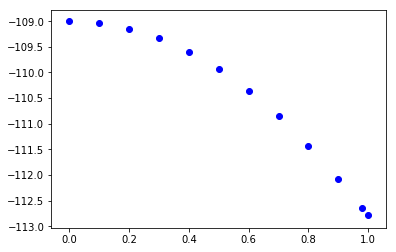

In [28]:
for i in np.linspace(0,1,11):
    plt.scatter(i,E(i),color="blue")
plt.scatter(.98,E(.98),color="red")

In [9]:
eT_R=E(-1,zbs=False)

In [15]:
e_co=scf.RHF(gto.M(atom="C 0 0 0; O 0 0 2.05",unit="Bohrs",basis=bse.get_basis("def2-qzvpp"\
                                                       ,fmt="nwchem",elements=["C","N","O"]))).scf()
e_nn=scf.RHF(gto.M(atom="N 0 0 0; N 0 0 2.05",unit="Bohrs",basis=bse.get_basis("def2-qzvpp"\
                                                       ,fmt="nwchem",elements=["C","N","O"]))).scf()

converged SCF energy = -112.79122561259
converged SCF energy = -108.994466673864


In [32]:
E(.99999)

-112.79098429048736

In [29]:
E(1)

-112.79122561259258

In [16]:
#5pts finite difference coefficients
fd1=np.asarray([1/12,-2/3 ,0,2/3,-1/12])
fd2=np.asarray([-1/12,4/3,-5/2,4/3,-1/12])
fd3=np.asarray([-1/2,1,0,-1,1/2])
fd4=np.asarray([1,-4,6,-4,1])
fds=[fd1,fd2,fd3,fd4]
fds5=get_coeffs(5)
fds7=get_coeffs(7)

In [35]:
dl=.2
Es=np.asarray([E(-3*dl),E(-2*dl),E(-dl),e_nn,E(dl),E(2*dl),E(3*dl)])
apdft=[e_nn]
inc=[]
for i in range(6):
    inc.append(fds7[i+1].dot(np.asarray(Es))/dl**(i+1)/np.math.factorial(i+1))
    apdft.append(apdft[i]+inc[-1] )
apdft,e_co,inc

([-108.9944666738644,
  -108.99446667386576,
  -112.79262509136882,
  -112.79262509135606,
  -112.7092364371839,
  -112.70923643720926,
  -112.95547126384676],
 -112.7912256125902,
 [-1.3655743202889425e-12,
  -3.7981584175030636,
  1.2767564783189299e-11,
  0.08338865417215992,
  -2.5350092395607736e-11,
  -0.2462348266374986])

In [36]:
dl=.1
Es=np.asarray([E(-2*dl),E(-dl),e_nn,E(dl),E(2*dl)])
apdft=[e_nn]
inc=[]
for i in range(4):
    inc.append(fds5[i+1].dot(np.asarray(Es))/dl**(i+1)/np.math.factorial(i+1))
    apdft.append(apdft[i]+fds5[i+1].dot(np.asarray(Es))/dl**(i+1)/np.math.factorial(i+1) )
apdft,e_co,inc

([-108.9944666738644,
  -108.99446667386297,
  -112.79370591348635,
  -112.79370591353371,
  -112.6931460994106],
 -112.7912256125902,
 [1.4210854715202004e-12,
  -3.7992392396233745,
  -4.736951571734e-11,
  0.10055981412312082])

In [14]:
dl=.05
Es=np.asarray([E(-3*dl,zbs=False),E(-2*dl,zbs=False),E(-dl,zbs=False),e_nn,E(dl,zbs=False),E(2*dl,zbs=False),E(3*dl,zbs=False)])
apdft=[e_nn]
inc=[]
for i in range(6):
    inc.append(fds7[i+1].dot(np.asarray(Es))/dl**(i+1)/np.math.factorial(i+1))
    apdft.append(apdft[i]+fds7[i+1].dot(np.asarray(Es))/dl**(i+1)/np.math.factorial(i+1) )
apdft,eT_R,e_co,inc

([-108.99446667386448,
  -108.99446667386263,
  -112.78864567624966,
  -112.7886456765694,
  -112.78083089677723,
  -112.78083088559802,
  -112.78087038924775],
 -112.78087807862228,
 -112.79122561259028,
 [1.84297022087776e-12,
  -3.7941790023870317,
  -3.1974423109204503e-10,
  0.007814779792170155,
  1.1179205709292239e-08,
  -3.950364973408997e-05])

In [18]:
def E_cn(l,zbs=True):
    if zbs:
        mol_l=FcM(fcs=[-l,0],atom="N1 0 0 0; N2 0 0 2.05",unit="Bohrs",basis={"N1":g321(7-l,ref=7),"N2":g321(7)},verbose=1)
    elif not zbs:
        mol_l=FcM(fcs=[-l,0],atom="N1 0 0 0; N2 0 0 2.05",unit="Bohrs",basis={"N1":g321(7,ref=7),"N2":g321(7)},verbose=1)
    mf_l=scf.RHF(mol_l)
    #mf_l.conv_tol=1e-12
    #mf_l.conv_tol_grad=1e-12
    e=mf_l.scf(dm0=mf_l.init_guess_by_1e())
    return e

In [26]:
mf_cn=scf.RHF(gto.M(atom="C 0 0 0; N 0 0 2.05",unit="Bohrs",basis=bse.get_basis("def2-qzvpp"\
                                                       ,fmt="nwchem",elements=["C","N","O"]),charge=-1))
e_cn=mf_cn.scf()

converged SCF energy = -92.3311381205634


In [27]:
dl=.1
Es=np.asarray([E_cn(-3*dl),E_cn(-2*dl),E_cn(-dl),e_nn,E_cn(dl),E_cn(2*dl),E_cn(3*dl)])
apdft=[e_nn]
inc=[]
for i in range(6):
    inc.append(np.einsum('i,i',fds7[i+1],Es)/dl**(i+1)/np.math.factorial(i+1))
    apdft.append(apdft[i]+inc[-1] )
apdft=np.asarray(apdft)
apdft,e_cn,apdft-e_cn,inc

(array([-108.99022518,  -90.71384198,  -92.36873439,  -92.32823196,
         -92.32992828,  -92.32966556,  -92.33027783]),
 -92.33113812056337,
 array([-1.66590871e+01,  1.61729614e+00, -3.75962660e-02,  2.90615936e-03,
         1.20983821e-03,  1.47255809e-03,  8.60294548e-04]),
 [18.276383197856383,
  -1.6548924032765864,
  0.04050242533656007,
  -0.0016963211516933063,
  0.0002627198843659546,
  -0.0006122635435682845])

In [28]:
dl=.1
Es=np.asarray([E_cn(-3*dl,zbs=False),E_cn(-2*dl,zbs=False),E_cn(-dl,zbs=False),e_nn,E_cn(dl,zbs=False),E_cn(2*dl,zbs=False),E_cn(3*dl,zbs=False)])
apdft=[e_nn]
inc=[]
for i in range(6):
    inc.append(np.einsum('i,i',fds7[i+1],Es)/dl**(i+1)/np.math.factorial(i+1))
    apdft.append(apdft[i]+inc[-1] )
apdft=np.asarray(apdft)
apdft,E_cn(1,zbs=False),e_cn,apdft-E_cn(1,zbs=False),apdft-e_cn,inc

(array([-108.99022518,  -90.71483653,  -92.32627163,  -92.2914705 ,
         -92.28796925,  -92.28913923,  -92.28907515]),
 -92.28904306800459,
 -92.33113812056337,
 array([-1.67011821e+01,  1.57420654e+00, -3.72285657e-02, -2.42742810e-03,
         1.07382148e-03, -9.61590163e-05, -3.20785617e-05]),
 array([-1.66590871e+01,  1.61630159e+00,  4.86648683e-03,  3.96676245e-02,
         4.31688740e-02,  4.19988935e-02,  4.20629740e-02]),
 [18.275388649232564,
  -1.6114351018422954,
  0.0348011376220351,
  0.003501249585073177,
  -0.0011699804976691057,
  6.408045452291033e-05])

In [29]:
#check if basis are orthonormal
#They are

In [37]:
# check bsec if works better?